# Clustering Analytics (Retail Customer)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

In [5]:
# Load the data
df = pd.read_csv('CustomerData.csv')

In [6]:
# Identifying the shape of the data frame
print(f'The test DataFrame has a total of: \n {df.shape[0]} rows\n {df.shape[1]} columns')

The test DataFrame has a total of: 
 8950 rows
 18 columns


## Data Cleaning

In [5]:
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


### Missing Data

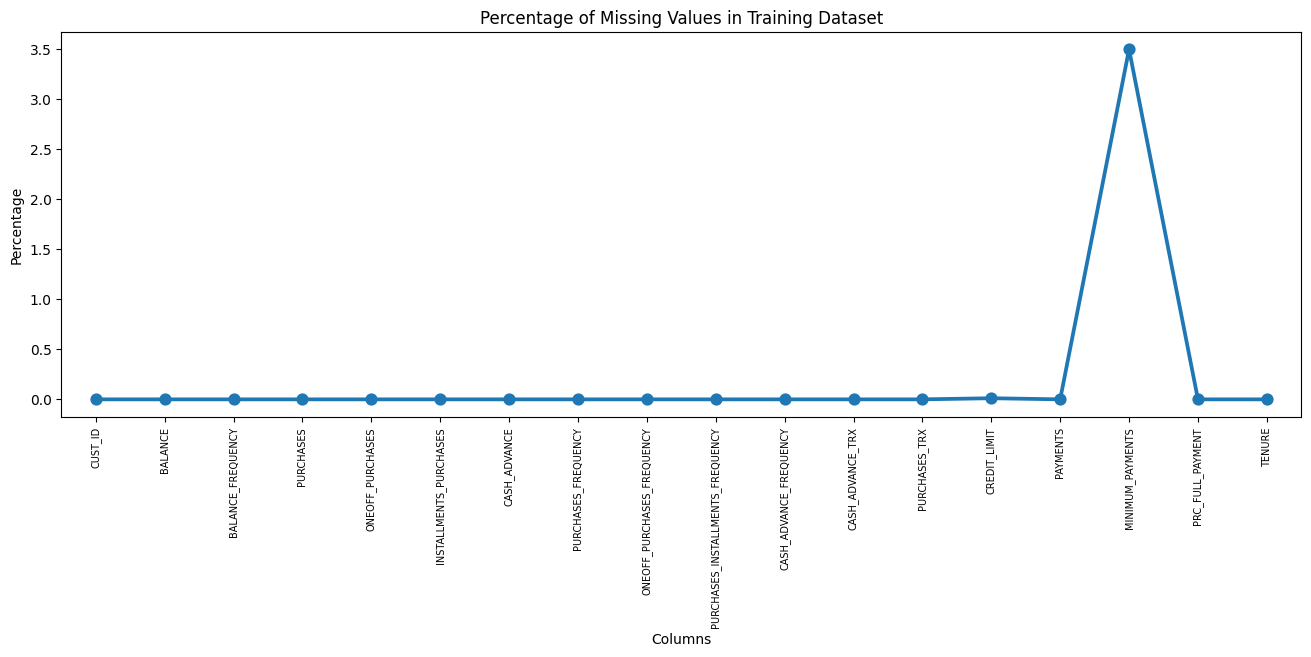

In [8]:
# Creation of new df to calculate percentage of missing data
missing = pd.DataFrame((df.isnull().sum()) * 100 / df.shape[0]).reset_index()
missing.columns = ['Column', 'Percentage']

# Plotting using seaborn
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='Column', y='Percentage', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values in Training Dataset")
plt.ylabel("Percentage")
plt.xlabel("Columns")
plt.show()

In [10]:
# Calculate Nan percent in each column
nan_percent_pa = (df.isna().sum() / len(df)) * 100


# Create a DataFrame from the series
nan_percent_pa_df = nan_percent_pa.reset_index()
nan_percent_pa_df.columns = ['Column', 'NaN_Percent']


# Sort the DataFrame by the percentage of NaNs in ascending order
nan_percent_df = nan_percent_pa_df.sort_values(by='NaN_Percent', ascending=False)


# Print the top variable with missing data in the variable. Because there is 14 variable with missing data therefore only the top 14 is display.
nan_percent_df.head(5)

,Column,NaN_Percent
15,MINIMUM_PAYMENTS,3.497207
13,CREDIT_LIMIT,0.011173
1,BALANCE,0.000000
0,CUST_ID,0.000000
2,BALANCE_FREQUENCY,0.000000


### Handle Missing Value

Based on the line chart below, it show the remaining missing data within the variable. There is currently 11 column with missing data less than 5%.

In [11]:
# Empty list for storing variable with missing data
variables = []


# Create a for loop identifying variable with missing data
for col in df.columns:
    if df[col].isnull().any():
        variables.append(col)


# Empty list for storing categorical data
numeric = []
object = []


# For loop to identify the data types and appending it
for variable in variables:
    if df[variable].dtypes == 'float64' or df[variable].dtypes == 'int':
        numeric.append(variable)
    else:
        object.append(variable)


# Print out the variable based on category
print('Numeric Data Structure')
for i,item in enumerate(numeric):
    print(i,item)
print('\n')

print('Object Data Structure')
for i,item in enumerate(object):
    print(i,item)

Numeric Data Structure
0 CREDIT_LIMIT
1 MINIMUM_PAYMENTS


Object Data Structure


Calculating the mean for the variable with missing data to replace the missing values.

In [12]:
mean = []

for j in numeric:
    m = df[j].mean().round(2)
    mean.append(m)
    print(j,m)

CREDIT_LIMIT 4494.45
MINIMUM_PAYMENTS 864.21


Replace the numeric missing value

In [13]:
numeric_tuple = zip(numeric,mean)

# .infer_objects(copy = False)
# It is a function which it will create another copy of the original data frame
# The goal is to infer the data type again after data manipulation

for col,value in numeric_tuple:
    df[col] = df[col].fillna(value).infer_objects(copy=False)

Double Checking Missing Value

In [14]:
# Calculate Nan percent in each column
nan_percent_pa = (df.isna().sum() / len(df)) * 100


# Create a DataFrame from the series
nan_percent_pa_df = nan_percent_pa.reset_index()
nan_percent_pa_df.columns = ['Column', 'NaN_Percent']


# Sort the DataFrame by the percentage of NaNs in ascending order
nan_percent_df = nan_percent_pa_df.sort_values(by='NaN_Percent', ascending=False)


# Print the top variable with missing data in the variable. Because there is 14 variable with missing data therefore only the top 14 is display.
nan_percent_df.head(5)

,Column,NaN_Percent
0,CUST_ID,0.0
1,BALANCE,0.0
2,BALANCE_FREQUENCY,0.0
3,PURCHASES,0.0
4,ONEOFF_PURCHASES,0.0


## EDA

In [15]:
# Identify the unique type of dtypes in the dataset
df.dtypes.unique()

array([dtype('O'), dtype('float64'), dtype('int64')], dtype=object)

In [16]:
# Seperating the variable into data types
numeric_variable = []
object_variable = []

for variable in df:
    if df[variable].dtypes == 'float64' or df[variable].dtypes == 'int64':
        numeric_variable.append(variable)
    else:
        object_variable.append(variable)

In [17]:
numeric_variable

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

In [18]:
object_variable

['CUST_ID']

In [25]:
# Create a copy of the df
df_copy = df.copy()

In [26]:
df_copy.drop('CUST_ID', axis = 1, inplace=True)

In [28]:
df_copy.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.210000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


### Univariate Analysis